This notebook shows how to plor Venn digram. A Venn diagram is a graphical representation of sets, or collections of objects. It consists of overlapping circles or other shapes, each representing a set. The portions of the circles that overlap indicate the objects that belong to both sets, while the non-overlapping portions indicate the objects that belong only to one set or the other.

This notebook uses the function from https://github.com/tctianchi/pyvenn repository. 

In [2]:
%matplotlib inline
import pandas as pd
from venn import venn

For this specific purpose we will use a tabular data from TCGA (https://www.cancer.gov/ccg/research/genome-sequencing/tcga). The Cancer Genome Atlas (TCGA) is a research project initiated by the National Cancer Institute (NCI) and the National Human Genome Research Institute (NHGRI) in the United States. The goal of TCGA was to analyze and catalog the genomic changes that occur in various types of cancer, with the aim of improving our understanding of the genetic basis of cancer and ultimately improving cancer diagnosis, treatment, and prevention.

To download this specific data (TCGA-CRC-DX) please use the following link: https://drive.google.com/file/d/103Jy4sSP7HIeRa7Pq1KKsFrRWX9R7mjP/view?usp=sharing

TCGA-CRC refers to the subset of data from The Cancer Genome Atlas (TCGA) project that pertains to colorectal cancer (CRC). TCGA-CRC includes comprehensive molecular and clinical data from hundreds of patients with CRC, including DNA sequencing, RNA sequencing, epigenetic profiling, and protein expression data. The goal of TCGA-CRC is to provide a comprehensive understanding of the genetic and molecular changes that occur in colorectal cancer, and to identify potential new targets for therapy.

In [4]:
input_file = (r"G:\My Drive\Data\TCGA-CRC-DX-MUTATIONS.csv")
df = pd.read_csv(input_file)
df.head(5)

,PATIENT,KRAS,BRCA1,BRIP1,ATM,BRAF,FGFR3,BARD1,FGFR2,RAD54L,...,POU2AF1,ATR,PAG1,DICER1_x,MYH9,TOP1,ELL,BMPR1A_x,CHIC2,DNMT3B
0,NaN,Level 1,Level 1,Level 1,Level 1,Level 1,Level 1,Level 1,Level 1,Level 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-2F-A9KO,WT,WT,WT,MUT,WT,WT,WT,WT,WT,...,WT,WT,WT,MUT,WT,WT,WT,WT,WT,WT
2,TCGA-2F-A9KP,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TCGA-2F-A9KQ,WT,WT,WT,WT,WT,MUT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TCGA-2F-A9KR,WT,WT,MUT,WT,WT,MUT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [7]:
# Create sets based on the mutations
# Create sets based on the mutations
kras_mut = set(df[df["KRAS"]=="MUT"]["PATIENT"])
braf_mut = set(df[df["BRAF"]=="MUT"]["PATIENT"])
atm_mut = set(df[df["ATM"]=="MUT"]["PATIENT"])
top1_mut = set(df[df["TOP1"]=="MUT"]["PATIENT"])
fgfr3_mut = set(df[df["FGFR3"]=="MUT"]["PATIENT"])

<Axes: >

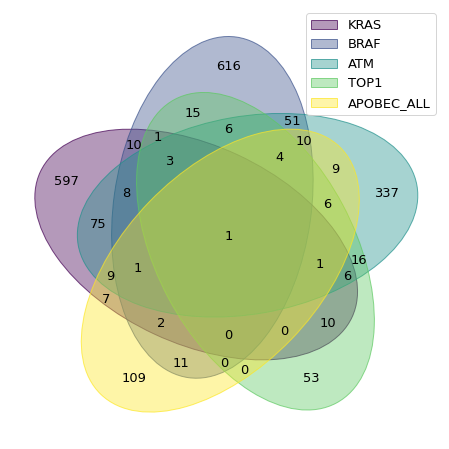

In [8]:
names = ['KRAS', 'BRAF', 'ATM', 'TOP1', 'FGFR3']
mut_dic = {'KRAS':kras_mut, 'BRAF': braf_mut, 'ATM': atm_mut, 'TOP1':top1_mut, 'APOBEC_ALL':fgfr3_mut}
venn(mut_dic)

It is also possible to show the percentage of overlaps between different groups instead of the actual number. 

c:\Users\User\anaconda3\lib\site-packages\venn\_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
c:\Users\User\anaconda3\lib\site-packages\venn\_backwards_compatibility.py:30: UserWarning: `venn5()` is retained for backwards compatibility; use `venn()` instead
  warn((


(<Figure size 648x648 with 1 Axes>, <Axes: >)

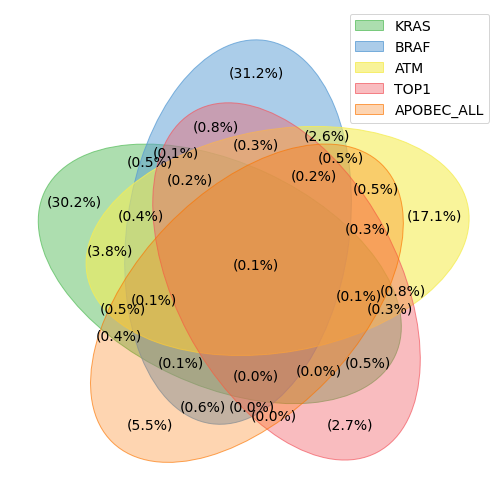

In [9]:
from venn import get_labels, venn3

labels = get_labels(mut_dic.values(), fill=["percent"])
venn3(labels=labels, names=mut_dic.keys())